In [9]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [10]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLALchemy ORM

In [11]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [14]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [15]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Bonus Challenge Assignment: Temperature Analysis II

In [18]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, maximum, and average temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurementa.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# For example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use the function `calc_temps` to calculate the tmin, tavg, and tmax 
# for a year in the data set
avg_temp = calc_temps('2017-08-01', '2017-08-07')
avg_temp


[(72.0, 79.25, 83.0)]

In [31]:
Tmin = avg_temp[0][0]
Tmax = avg_temp[0][2]
Tavg = avg_temp[0][1]

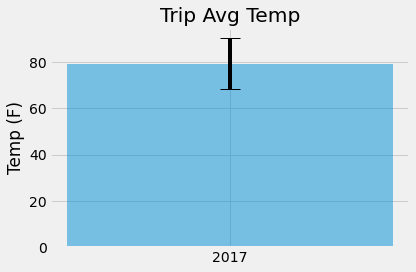

In [33]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for bar height (y value)
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

#materials = ['Aluminum', 'Copper', 'Steel']
#x_pos = np.arange(len(materials))
#CTEs = [Tavg]
x_pos = '2017'
error = Tmax - Tmin

fig, ax = plt.subplots()
ax.bar(x_pos, Tavg, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylabel('Temp (F)')
#ax.set_xticks(x_pos)
#ax.set_xticklabels(materials)
ax.set_title('Trip Avg Temp')
ax.yaxis.grid(True)

# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

### Daily Rainfall Average

In [58]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's 
# matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

session.query(Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation,func.sum(Measurement.prcp)).group_by(Measurement.station) .\
filter(Measurement.station == Station.station).\
filter(Measurement.date>= '2016-08-01').\
filter(Measurement.date< '2016-08-07').\
order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 5.549999999999998),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 3.3499999999999996),
 ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 3.29),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.9000000000000001),
 ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.55),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.18000000000000002),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.18)]

### Daily Temperature Normals

In [69]:
# Use this function to calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()

# For example
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [93]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = '2017-08-01'
end_date = '2017-08-07'

# Use the start and end date to create a range of dates
import pandas as pd
from datetime import datetime

#pd.date_range(end = datetime.today(), periods = 100).to_pydatetime().tolist()

#OR

# Strip off the year and save a list of strings in the format %m-%d

dates = pd.date_range(start=start_date,end=end_date).strftime("%m-%d").tolist()

#print(dates)


# Use the `daily_normals` function to calculate the normals for each date string 
# and append the results to a list called `normals`.
normals=[]
for date in dates:
    result=daily_normals(date)
    normals.append(daily_normals(date))
    

#print(normals)  

flat_list = []
for sublist in normals:
    for item in sublist:
        flat_list.append(item)


print(flat_list)  
   

[(67.0, 75.54, 83.0), (68.0, 75.60377358490567, 84.0), (70.0, 76.61111111111111, 85.0), (69.0, 76.71153846153847, 84.0), (69.0, 76.14814814814815, 82.0), (67.0, 76.25, 83.0), (71.0, 77.15686274509804, 83.0)]


In [99]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(flat_list, columns=['T_min', 'T_avg', 'T_max'])
#print(normals_df) 

normals_df['dates'] = dates

normals_df.set_index('dates',inplace=True, drop=True)
#df.set_index('date', drop=True)
normals_df

,T_min,T_avg,T_max,dates
0,67.0,75.540000,83.0,08-01
1,68.0,75.603774,84.0,08-02
2,70.0,76.611111,85.0,08-03
3,69.0,76.711538,84.0,08-04
4,69.0,76.148148,82.0,08-05
5,67.0,76.250000,83.0,08-06
6,71.0,77.156863,83.0,08-07


<AxesSubplot:title={'center':'Area Plot'}, xlabel='dates'>

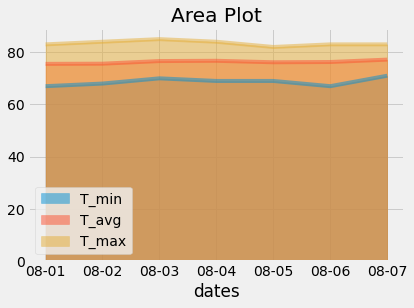

In [107]:
# Plot the daily normals as an area plot with `stacked=False`

normals_df.plot(kind='area', stacked=False, alpha=0.5, 
        title='Area Plot')

## Close Session